From: Simple Exploration Notebook V3.0
https://www.kaggle.com/sudalairajkumar/santander-product-recommendation/simple-exploration-notebook-v3-0

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

color = sns.color_palette()

data_path = "../data"
train_file = os.path.join(data_path, "train_ver2.csv")
test_file = os.path.join(data_path, "test_ver2.csv")

### Data set size:

In [3]:
train = pd.read_csv(train_file, usecols=['ncodpers'])
test = pd.read_csv(test_file, usecols=['ncodpers'])
print "Number of rows in train : ", train.shape[0]
print "Number of rows in test : ", test.shape[0]

Number of rows in train :  13647309
Number of rows in test :  929615


### No of customers

In [4]:
train_unique_customers = set(train.ncodpers.unique())
test_unique_customers = set(test.ncodpers.unique())
print "Number of customers in train : ", len(train_unique_customers)
print "Number of customers in test : ", len(test_unique_customers)
print "Number of common customers : ", len(train_unique_customers.intersection(test_unique_customers))

Number of customers in train :  956645
Number of customers in test :  929615
Number of common customers :  929615


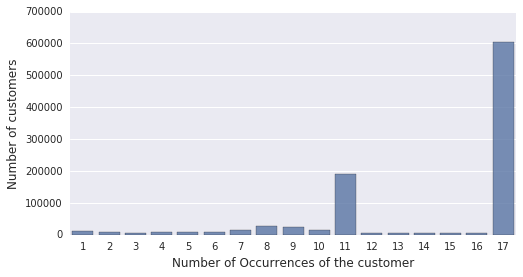

In [5]:
num_occur = train.groupby('ncodpers').agg('size').value_counts()

plt.figure(figsize=(8,4))
sns.barplot(num_occur.index, num_occur.values, alpha=0.8, color=color[0])
plt.xlabel('Number of Occurrences of the customer', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.show()

In [6]:
del train_unique_customers
del test_unique_customers

### Target Variables distribution:

There are 24 target variables present in this dataset are as follows:

1. ind_ahor_fin_ult1 - Saving Account
2. ind_aval_fin_ult1 - Guarantees
3. ind_cco_fin_ult1 - Current Accounts
4. ind_cder_fin_ult1 - Derivada Account
5. ind_cno_fin_ult1 - Payroll Account
6. ind_ctju_fin_ult1 - Junior Account
7. ind_ctma_fin_ult1 - Más particular Account
8. ind_ctop_fin_ult1 - particular Account
9. ind_ctpp_fin_ult1 - particular Plus Account
10. ind_deco_fin_ult1 - Short-term deposits
11. ind_deme_fin_ult1 - Medium-term deposits
12. ind_dela_fin_ult1 - Long-term deposits
13. ind_ecue_fin_ult1 - e-account
14. ind_fond_fin_ult1 - Funds
15. ind_hip_fin_ult1 - Mortgage
16. ind_plan_fin_ult1 - Pensions
17. ind_pres_fin_ult1 - Loans
18. ind_reca_fin_ult1 - Taxes
19. ind_tjcr_fin_ult1 - Credit Card
20. ind_valo_fin_ult1 - Securities
21. ind_viv_fin_ult1 - Home Account
22. ind_nomina_ult1 - Payroll
23. ind_nom_pens_ult1 - Pensions
24. ind_recibo_ult1 - Direct Debit

Let us check the number of times the given product has been bought in the train dataset

In [7]:
train = pd.read_csv(train_file, dtype='float16', 
                    usecols=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 
                             'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1'])

ind_ahor_fin_ult1       1396.0
ind_aval_fin_ult1        316.0
ind_cco_fin_ult1     8945588.0
ind_cder_fin_ult1       5376.0
ind_cno_fin_ult1     1103620.0
ind_ctju_fin_ult1     129297.0
ind_ctma_fin_ult1     132742.0
ind_ctop_fin_ult1    1760616.0
ind_ctpp_fin_ult1     591008.0
ind_deco_fin_ult1      24275.0
ind_deme_fin_ult1      22668.0
ind_dela_fin_ult1     586381.0
ind_ecue_fin_ult1    1129227.0
ind_fond_fin_ult1     252284.0
ind_hip_fin_ult1       80336.0
ind_plan_fin_ult1     125159.0
ind_pres_fin_ult1      35857.0
ind_reca_fin_ult1     716980.0
ind_tjcr_fin_ult1     605786.0
ind_valo_fin_ult1     349475.0
ind_viv_fin_ult1       52511.0
ind_nomina_ult1       745961.0
ind_nom_pens_ult1     810085.0
ind_recibo_ult1      1745712.0
dtype: float64


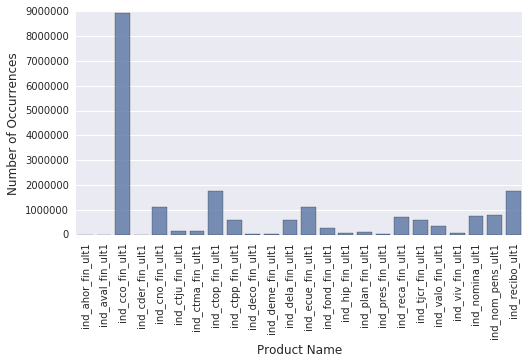

In [8]:
target_counts = train.astype('float64').sum(axis=0)
print target_counts
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color=color[0])
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
train

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### exploring date

- fecha_dato - The date of observation
- fecha_alta - The date in which the customer became as the first holder of a contract in the bank

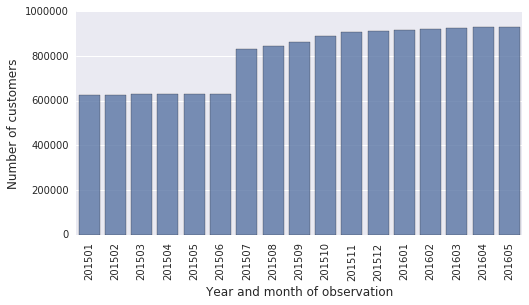

In [10]:
train = pd.read_csv(train_file, usecols=['fecha_dato', 'fecha_alta'], parse_dates=['fecha_dato', 'fecha_alta'])
train['fecha_dato_yearmonth'] = train['fecha_dato'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['fecha_dato_yearmonth'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[0])
plt.xlabel('Year and month of observation', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
train

,fecha_dato,fecha_alta,fecha_dato_yearmonth
0,2015-01-28,2015-01-12,201501
1,2015-01-28,2012-08-10,201501
2,2015-01-28,2012-08-10,201501
3,2015-01-28,2012-08-10,201501
4,2015-01-28,2012-08-10,201501
5,2015-01-28,2012-08-10,201501
6,2015-01-28,2012-08-10,201501
7,2015-01-28,2012-08-10,201501
8,2015-01-28,2012-08-10,201501
9,2015-01-28,2012-08-10,201501


Minimum value of fetcha_alta :  199501.0
Maximum value of fetcha_alta :  201605.0


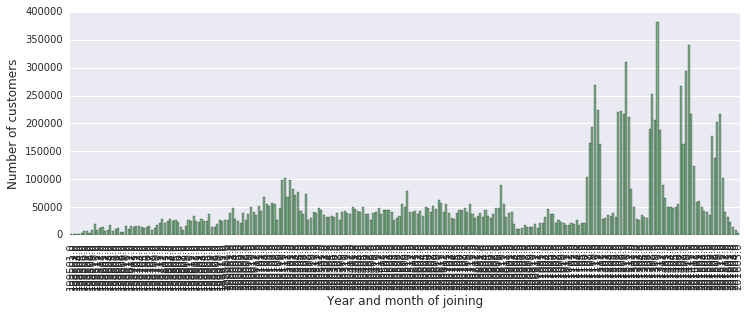

In [12]:
train['fecha_alta_yearmonth'] = train['fecha_alta'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['fecha_alta_yearmonth'].value_counts()
print "Minimum value of fetcha_alta : ", min(yearmonth.index)
print "Maximum value of fetcha_alta : ", max(yearmonth.index)

plt.figure(figsize=(12,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[1])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

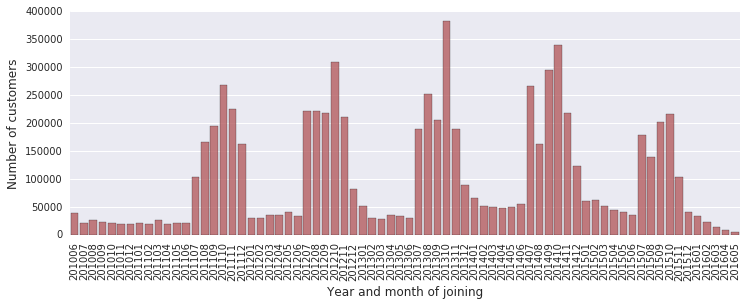

In [27]:
year_month = yearmonth.sort_index().reset_index()
year_month = year_month.ix[185:]
year_month.columns = ['yearmonth', 'number_of_customers']

plt.figure(figsize=(12,4))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8, color=color[2])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Numerical variables exploration:

### Age:

In [28]:
train = pd.read_csv(train_file, usecols=['age'])
train.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age
0,35
1,23
2,23
3,22
4,23


In [31]:
print list(train.age.unique())

[' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53', ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42', ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60', ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84', ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52', ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16', ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96', ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64', ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75', '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91', ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101', '106', '103', '  3', '  2', '102', '104', '111', '107', '109', '105', '112', '115', '110', '116', '108', '113', 37, 81, 43, 30, 45, 41, 67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48, 60, 54, 51, 33, 62, 50, 11, 57, 55, 85, 80, 70, 32, 52, 94, 61, 13, 29, 49, 76, 28, 63, 10, 88, 68, 64, 58, 56

In [32]:
train['age'] = train['age'].replace(to_replace=[' NA'], value=np.nan)

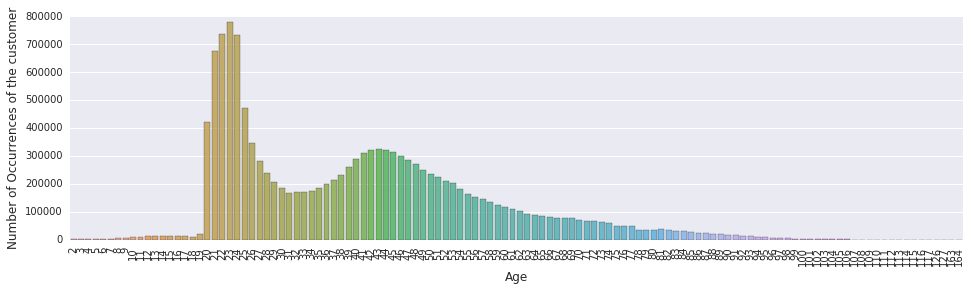

In [37]:
train['age'] = train['age'].astype('float64')

age_series = train.age.value_counts()
plt.figure(figsize=(16,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
train.age.isnull().sum()

27734

In [39]:
train.age.mean()

40.181464913552738

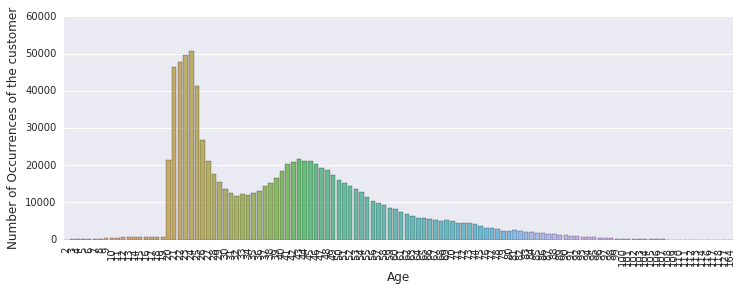

In [40]:
test = pd.read_csv(test_file, usecols=['age'])
test['age'] = test['age'].replace(to_replace=[' NA'], value=np.nan)
test['age'] = test['age'].astype('float64')

age_series = test.age.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### ANTIGUEDAD: (seniority)

In [41]:
train = pd.read_csv(train_file, usecols=['antiguedad'])
train.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,antiguedad
0,6
1,35
2,35
3,35
4,35


In [42]:
print list(train.antiguedad.unique())

['      6', '     35', '     34', '     NA', '     33', '     31', '     21', '     16', '     27', '      9', '     22', '     13', '     29', '      8', '     11', '     10', '     28', '     24', '      7', '     25', '     14', '     26', '     12', '     23', '      1', '     18', '      4', '      3', '     17', '     32', '     30', '     20', '     15', '     19', '    157', '     36', '      5', '     40', '     38', '     37', '     39', '      0', '      2', '     47', '     44', '     42', '     46', '     45', '     43', '     41', '     57', '     48', '     52', '     49', '     50', '     56', '     58', '     51', '     55', '     54', '     53', '     59', '     62', '     61', '     60', '     63', '    139', '    165', '    118', '    164', '    142', '     94', '    159', '    143', '    105', '    151', '    162', '    137', '    150', '    128', '    122', '    156', '    119', '    160', '     79', '     95', '    132', '    161', '     98', '    127', '     72'

In [43]:
train['antiguedad'] = train['antiguedad'].replace(to_replace=['     NA'], value=np.nan)
train.antiguedad.isnull().sum()

27734

In [44]:
train['antiguedad'] = train['antiguedad'].astype('float64')
(train['antiguedad'] == -999999.0).sum()

38

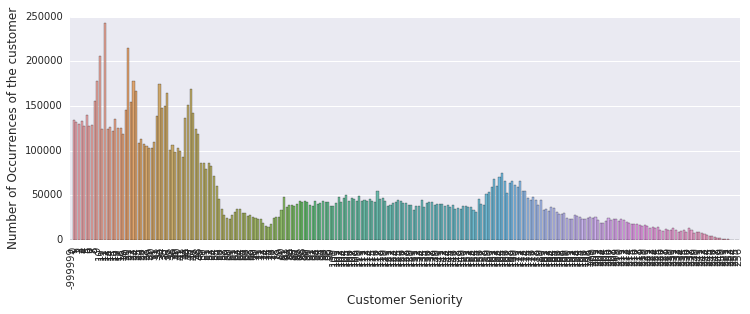

In [45]:
col_series = train.antiguedad.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(col_series.index.astype('int'), col_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Customer Seniority', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

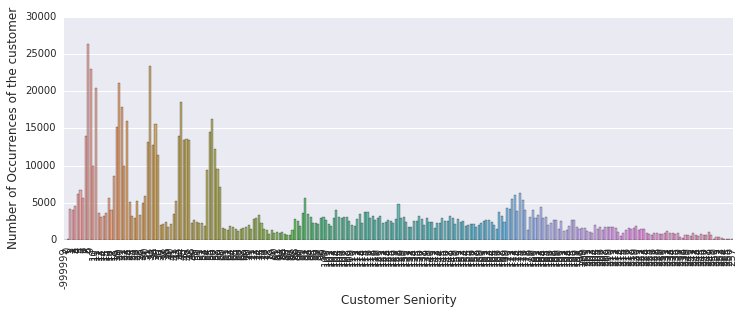

In [46]:
test = pd.read_csv(test_file, usecols=['antiguedad'])
test['antiguedad'] = test['antiguedad'].replace(to_replace=[' NA'], value=np.nan)
test['antiguedad'] = test['antiguedad'].astype('float64')

col_series = test.antiguedad.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(col_series.index.astype('int'), col_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Customer Seniority', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Renta
Gross income of the household.

> Your gross income is the amount of money you earn before anything is taken out for taxes or other deductions.
[ref](https://www.quicken.com/what-gross-income)

In [47]:
train = pd.read_csv(train_file, usecols=['renta'])
train.head()

,renta
0,87218.10
1,35548.74
2,122179.11
3,119775.54
4,NaN


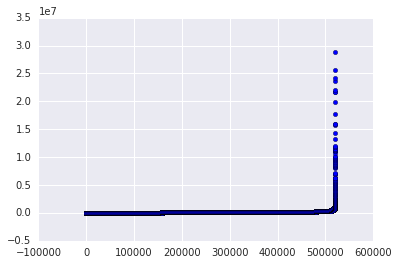

In [48]:
unique_values = np.sort(train.renta.unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.show()

In [49]:
train.renta.mean()

134254.31823814093

In [50]:
train.renta.median()

101850.0

In [55]:
print '#null:', train.renta.isnull().sum()
print '#null(percentage):', float(train.renta.isnull().sum()) / len(train) * 100

#null: 2794375
#null(percentage): 20.4756483494


There are quite a few number of missing values present in this field.! We can do some form of imputation for the same. One very good idea is given by [Alan](https://www.kaggle.com/apryor6/santander-product-recommendation/detailed-cleaning-visualization-python) in this script.

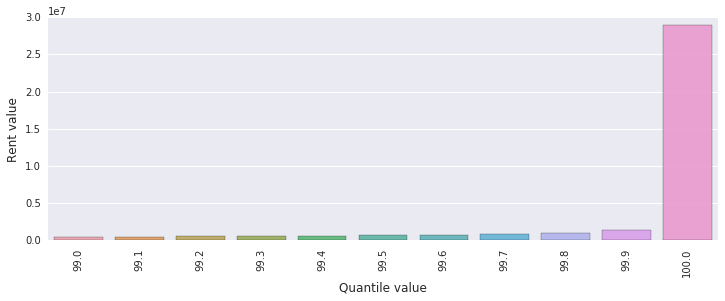

In [56]:
train.fillna(101850., inplace=True) #filling NA as median for now
quantile_series = train.renta.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.ylabel('Rent value', fontsize=12)
plt.xlabel('Quantile value', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

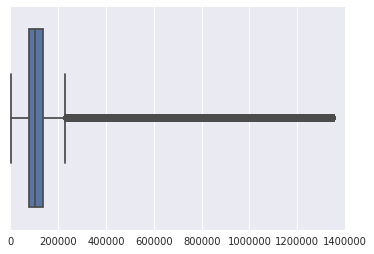

In [60]:
rent_max_cap = train.renta.quantile(0.999)
train['renta'][train['renta']>rent_max_cap] = 101850.0 # assigining median value 
sns.boxplot(train.renta.values)
plt.show()

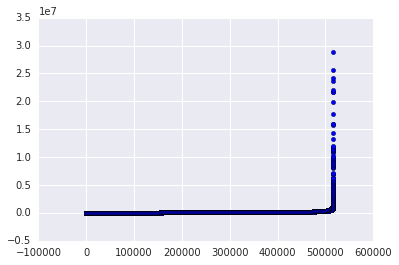

In [61]:
test = pd.read_csv(test_file, usecols=['renta'])
test['renta'] = test['renta'].replace(to_replace=['         NA'], value=np.nan).astype('float') # note that there is NA value in test
unique_values = np.sort(test.renta.unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.show()

In [62]:
test.renta.mean()

134087.8705946269

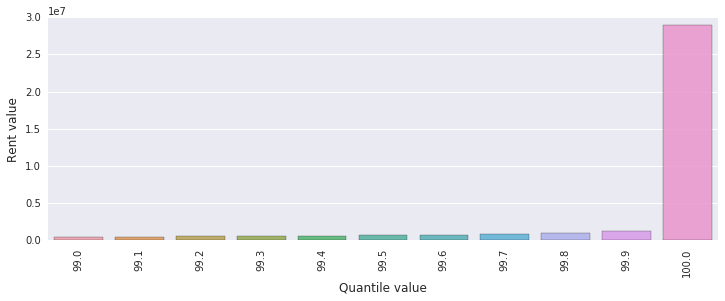

In [63]:
test.fillna(101850., inplace=True) #filling NA as median for now
quantile_series = test.renta.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.ylabel('Rent value', fontsize=12)
plt.xlabel('Quantile value', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

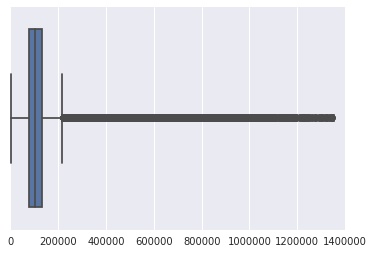

In [64]:
test['renta'][test['renta']>rent_max_cap] = 101850.0 # assigining median value 
sns.boxplot(test.renta.values)
plt.show()

### Numerical variables Vs Target variables:

In [66]:
train = pd.read_csv(train_file, nrows=100000)
target_cols = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1']
train[target_cols] = (train[target_cols].fillna(0))
train["age"] = train['age'].map(str.strip).replace(['NA'], value=0).astype('float')
train["antiguedad"] = train["antiguedad"].map(str.strip)
train["antiguedad"] = train['antiguedad'].replace(['NA'], value=0).astype('float')
train["antiguedad"].ix[train["antiguedad"]>65] = 65 # there is one very high skewing the graph
train["renta"].ix[train["renta"]>1e6] = 1e6 # capping the higher values for better visualisation
train.fillna(-1, inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


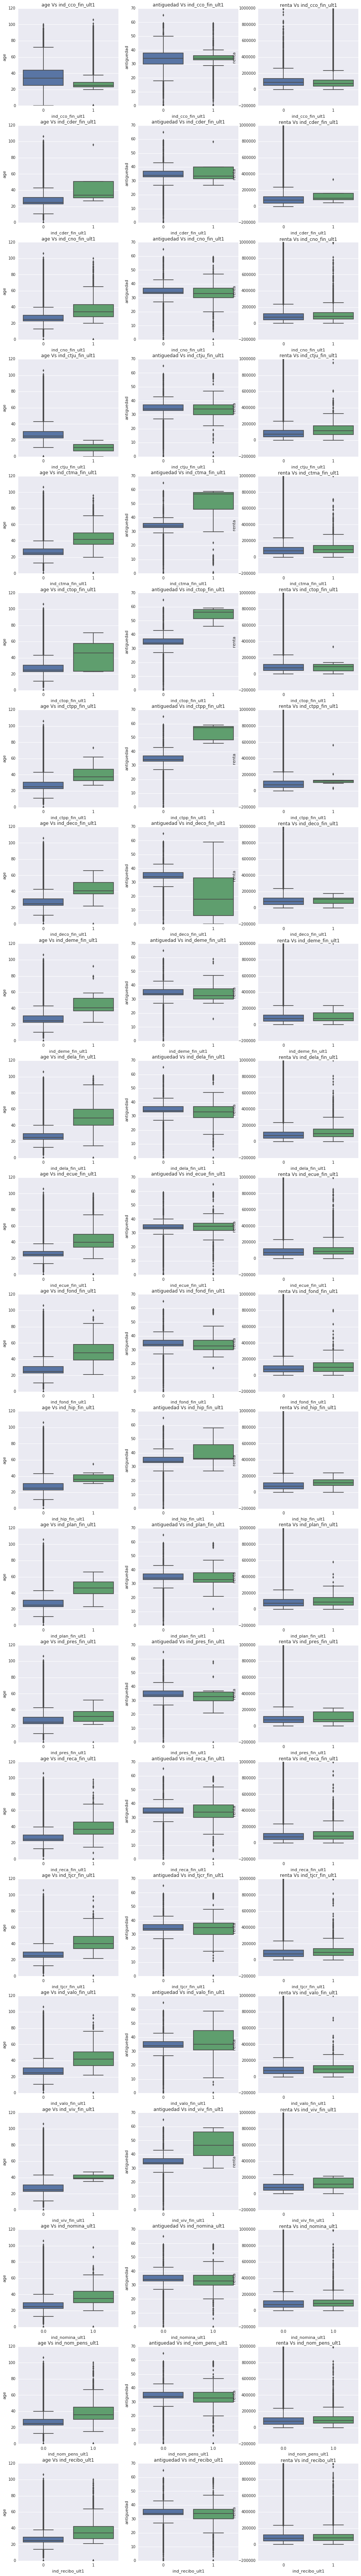

In [70]:
fig = plt.figure(figsize=(16, 120))
numeric_cols = ['age', 'antiguedad', 'renta']
#for ind1, numeric_col in enumerate(numeric_cols):
plot_count = 0
for ind, target_col in enumerate(target_cols):
    for numeric_col in numeric_cols:
        plot_count += 1
        plt.subplot(22, 3, plot_count)
        sns.boxplot(x=target_col, y=numeric_col, data=train)
        plt.title(numeric_col+" Vs "+target_col)
plt.show()

### Exploring categorical fields:

Number of unique values in  ind_empleado  :  6


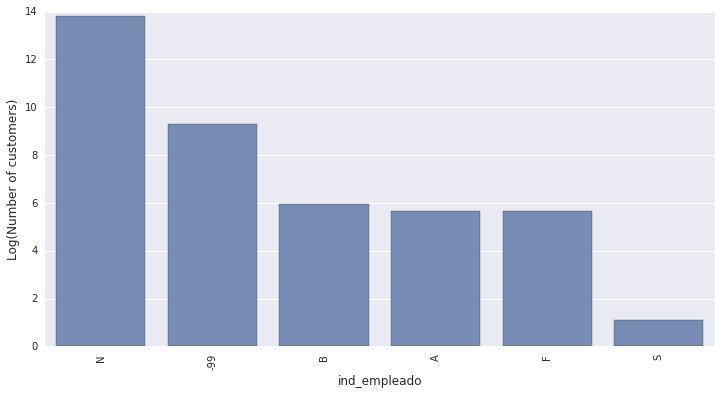


Number of unique values in  pais_residencia  :  114


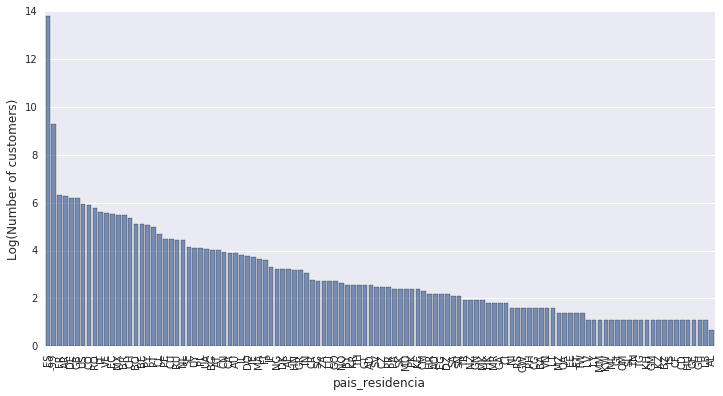


Number of unique values in  sexo  :  3


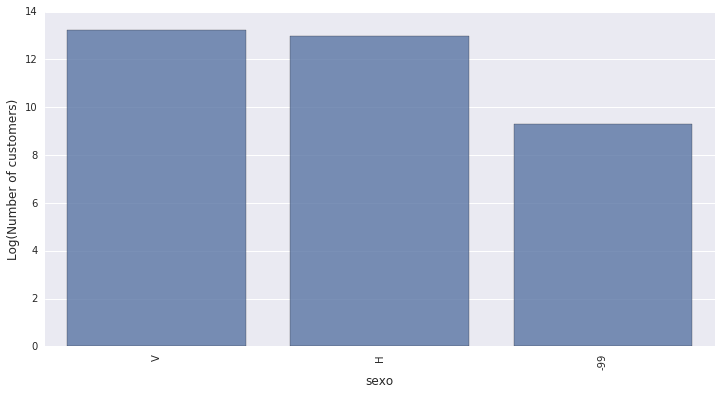


Number of unique values in  ind_nuevo  :  3


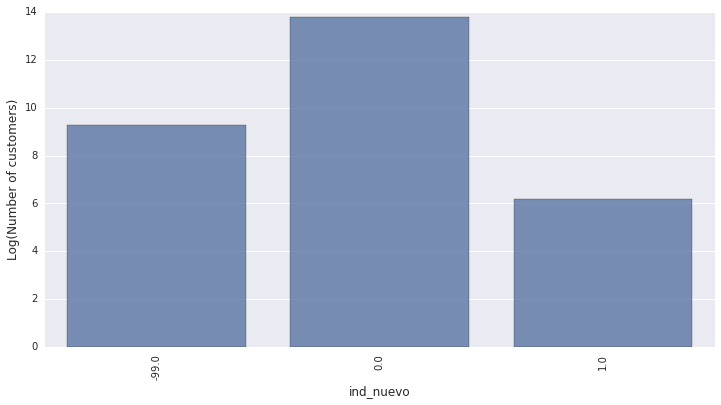


Number of unique values in  indrel  :  3


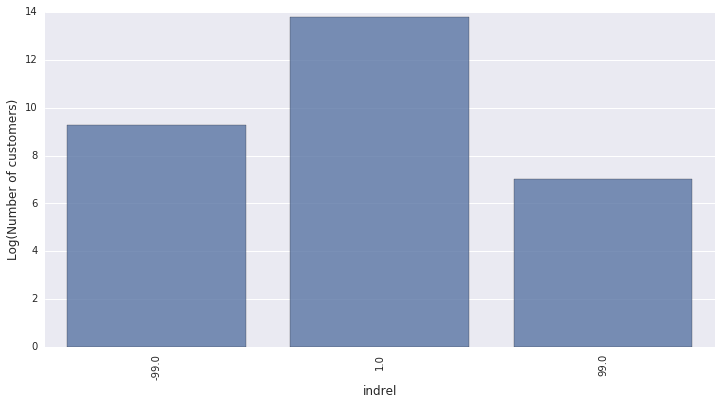


Number of unique values in  ult_fec_cli_1t  :  23


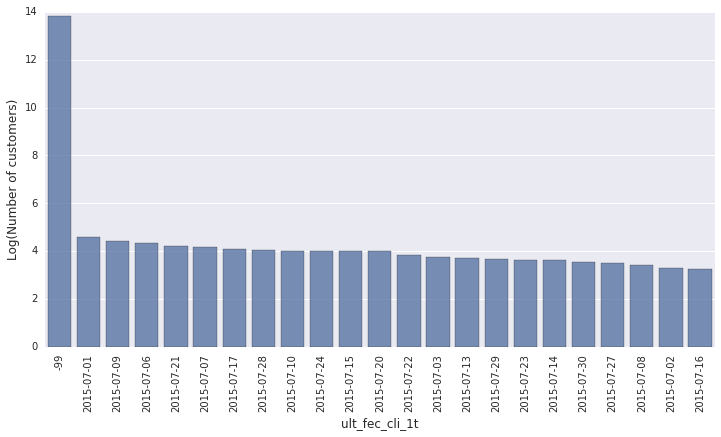


Number of unique values in  indrel_1mes  :  4


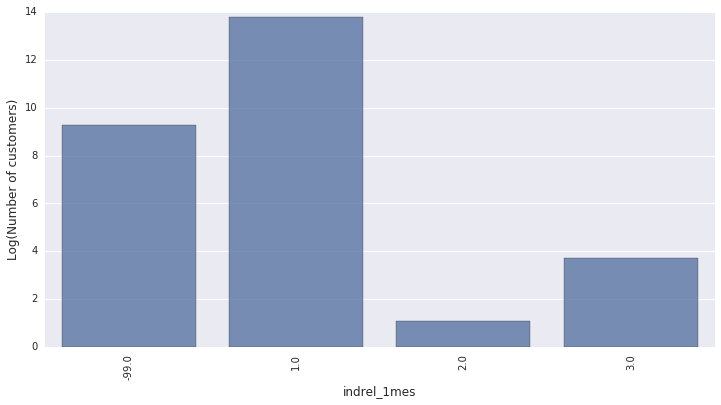


Number of unique values in  tiprel_1mes  :  4


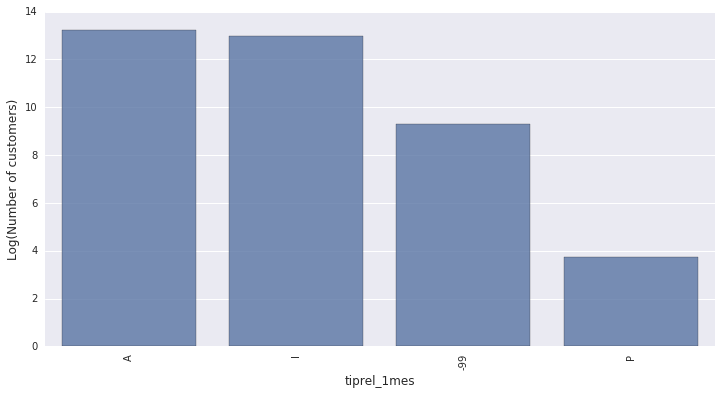


Number of unique values in  indresi  :  3


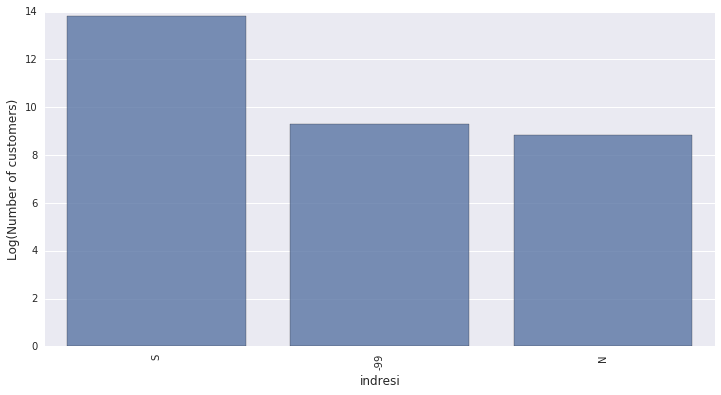


Number of unique values in  indext  :  3


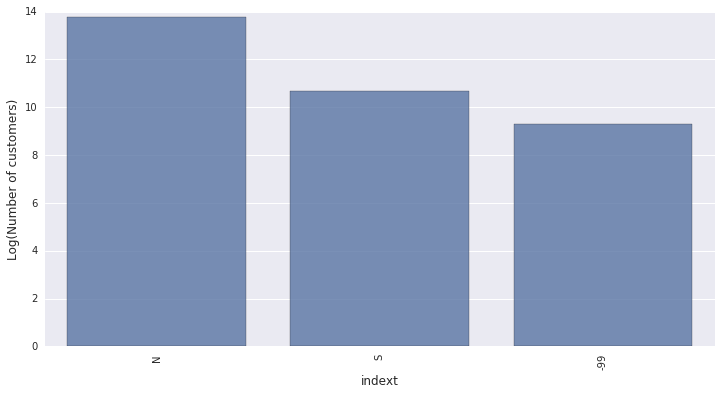


Number of unique values in  conyuemp  :  3


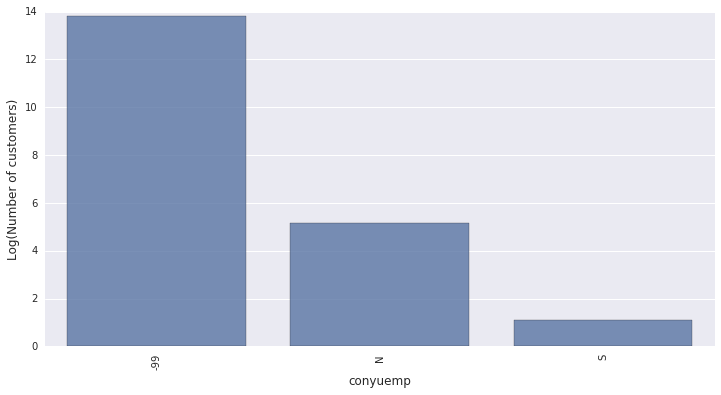


Number of unique values in  canal_entrada  :  157


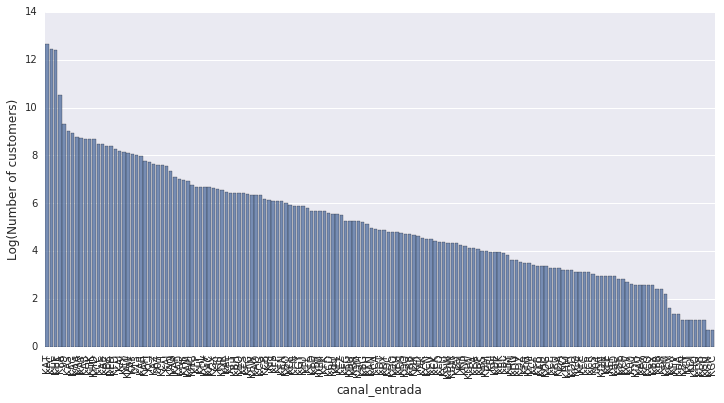


Number of unique values in  indfall  :  3


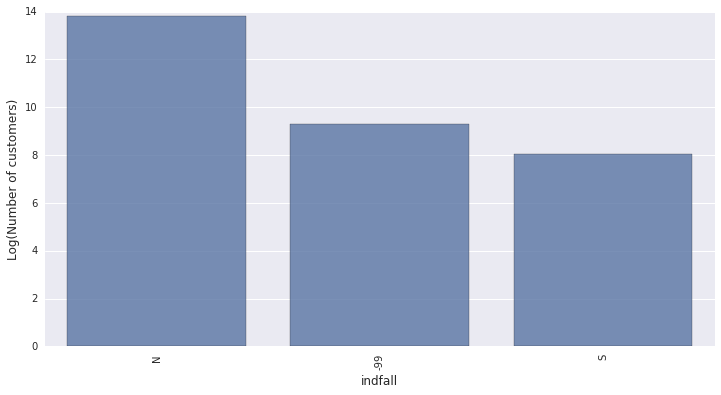


Number of unique values in  tipodom  :  2


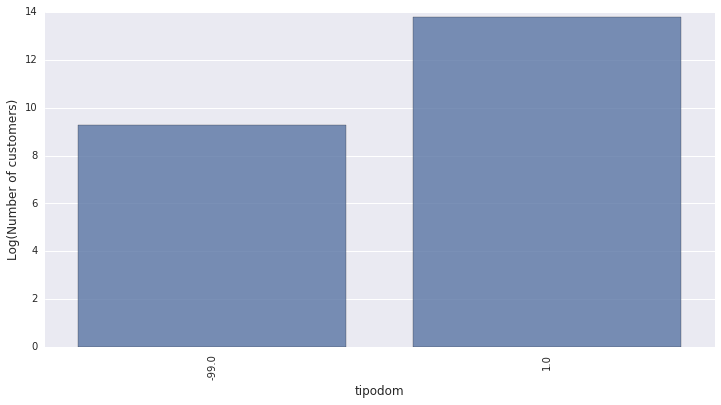


Number of unique values in  cod_prov  :  53


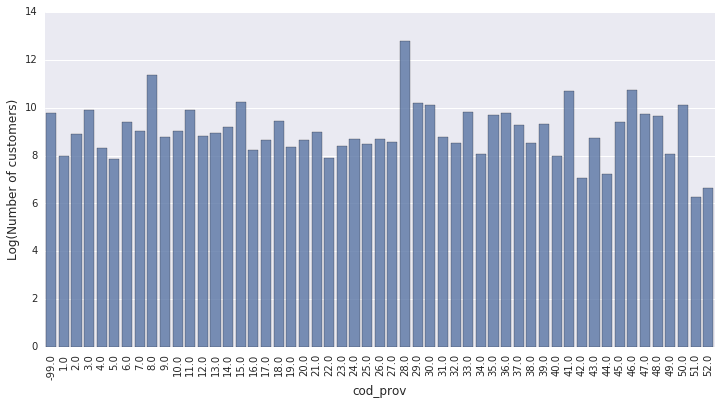


Number of unique values in  nomprov  :  53


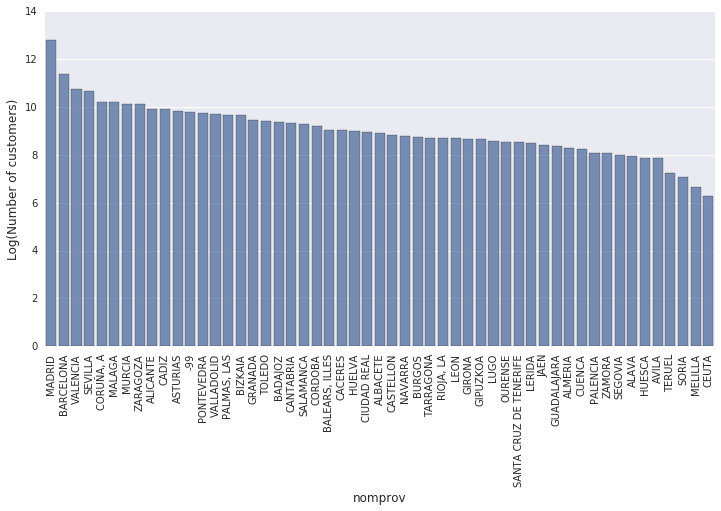


Number of unique values in  ind_actividad_cliente  :  3


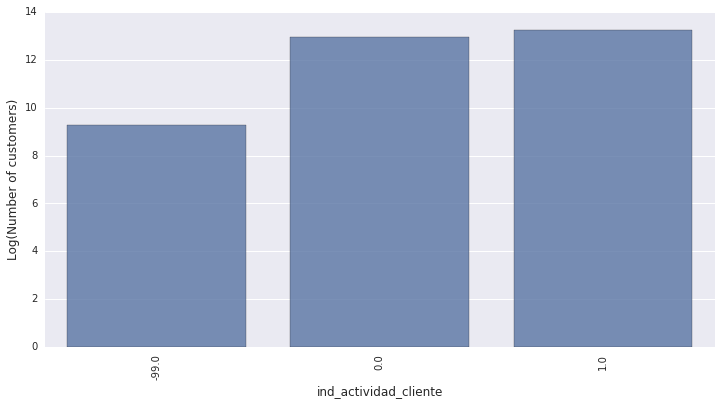


Number of unique values in  segmento  :  4


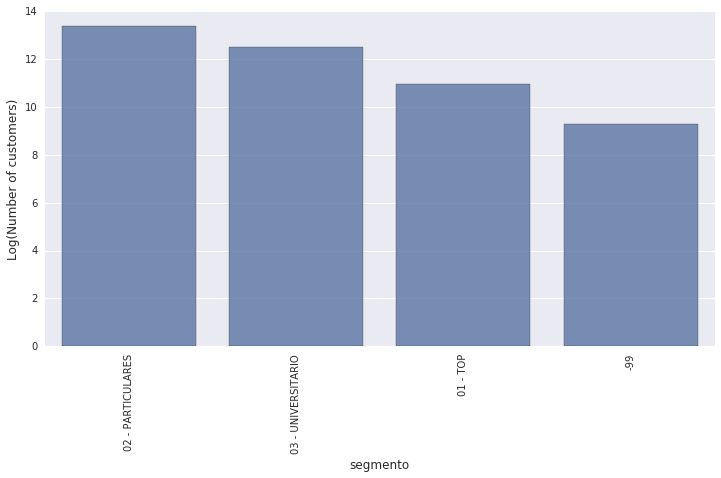

In [98]:
cols = ["ind_empleado","pais_residencia","sexo","ind_nuevo","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","segmento"]
for col in cols:
    train = pd.read_csv(train_file, usecols = ["ncodpers", col], nrows=1000000, encoding='utf8')
    train = train.fillna(-99)
    len_unique = len(train[col].unique())
    print "Number of unique values in ",col," : ",len_unique
    if len_unique < 200:
        agg_df = train[col].value_counts()
        plt.figure(figsize=(12,6))
        sns.barplot(agg_df.index, np.log1p(agg_df.values), alpha=0.8, color=color[0])
        plt.xlabel(col.encode('utf-8'), fontsize=12)
        plt.ylabel('Log(Number of customers)', fontsize=12)
        plt.xticks(rotation='vertical')
        plt.show()
    print 